# Preparación de datos y creación de Matriz de Características

## Preparación, visualización y limpieza de datos

Primeramente, importamos las librerías necesarias para trabajar, junto al dataframe principal, que estará en base al archivo "combined_data_vCorta.csv".

Visualizamos las primeras 5 filas para ver cómo se comporta el dataframe principal (de aquí en adelante df).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
ruta = r"C:\Users\leona\OneDrive\Documentos\netflix modulo\combined_data_vCorta.csv"
df = pd.read_csv(ruta, error_bad_lines=False)
df.head()

,id_movie,id_user,ranking,fecha
0,3,1025579,4,2003-03-29
1,3,712664,5,2004-02-01
2,3,1331154,4,2004-07-03
3,3,2632461,3,2005-07-22
4,3,44937,5,2004-06-22


Vemos lo mismo con la cola:

In [2]:
df.tail()

,id_movie,id_user,ranking,fecha
3768685,808,318116,2,2005-03-18
3768686,808,1033266,3,2005-05-01
3768687,808,2633357,4,2005-06-07
3768688,808,15737,2,2005-06-22
3768689,808,1226831,4,2005-09-23


Cambiaremos algunos nombres de las columnas, para trabajar de foma más cómoda

In [3]:
cabecera = ["id_movie", "id_user", "ranking", "date"]
df.columns = cabecera
df.head()

,id_movie,id_user,ranking,date
0,3,1025579,4,2003-03-29
1,3,712664,5,2004-02-01
2,3,1331154,4,2004-07-03
3,3,2632461,3,2005-07-22
4,3,44937,5,2004-06-22


Visualizamos los tipos de datos del df junto a características generales:

In [1]:
df.dtypes

NameError: name 'df' is not defined

In [5]:
df.describe()

,id_movie,id_user,ranking
count,3.768690e+06,3.768690e+06,3.768690e+06
mean,4.177394e+02,1.322334e+06,3.602383e+00
std,2.210622e+02,7.645477e+05,1.058069e+00
min,3.000000e+00,6.000000e+00,1.000000e+00
25%,2.530000e+02,6.609620e+05,3.000000e+00
50%,4.130000e+02,1.318953e+06,4.000000e+00
75%,6.070000e+02,1.984480e+06,4.000000e+00
max,8.080000e+02,2.649429e+06,5.000000e+00


In [6]:
df.describe(include = "all")

,id_movie,id_user,ranking,date
count,3.768690e+06,3.768690e+06,3.768690e+06,3768690
unique,NaN,NaN,NaN,2175
top,NaN,NaN,NaN,2005-01-19
freq,NaN,NaN,NaN,27082
mean,4.177394e+02,1.322334e+06,3.602383e+00,NaN
std,2.210622e+02,7.645477e+05,1.058069e+00,NaN
min,3.000000e+00,6.000000e+00,1.000000e+00,NaN
25%,2.530000e+02,6.609620e+05,3.000000e+00,NaN
50%,4.130000e+02,1.318953e+06,4.000000e+00,NaN
75%,6.070000e+02,1.984480e+06,4.000000e+00,NaN


Vemos el la fecha del dato más reciente, temporalmente hablando:

In [7]:
df.describe(include="all").date.top

'2005-01-19'

Ahora procederemos a visualizar los datos de cada columna del df, particularmente graficándolos.

4    1328952
3    1098566
5     813645
2     369008
1     158519
Name: ranking, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020085A33D48>]],
      dtype=object)

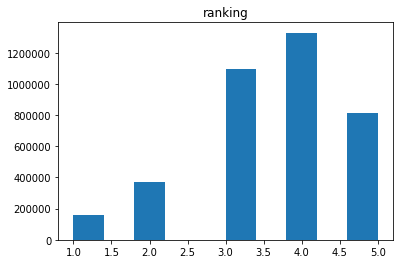

In [8]:
#Histograma de columna "ranking"

print(df['ranking'].value_counts())
df.hist(column = 'ranking', grid=False)

571    154832
30     118413
457    116762
758    104362
607    100248
        ...  
549        72
772        69
608        68
272        62
392        60
Name: id_movie, Length: 500, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200862BFD08>]],
      dtype=object)

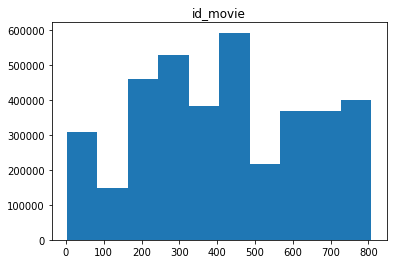

In [9]:
#Histograma de columna "id_movie"

print(df['id_movie'].value_counts())
df.hist(column = 'id_movie', grid=False)

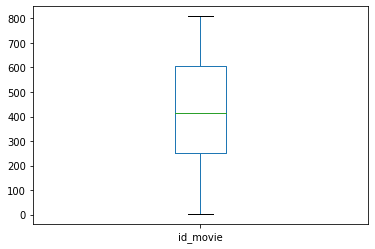

In [10]:
#Diagrama de caja de columna "id_movie"

df.boxplot(column = 'id_movie', grid=False)

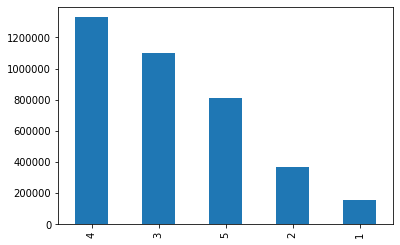

In [11]:
#Graficode barras de columna "ranking"

fig, ax = plt.subplots()
df['ranking'].value_counts().plot(ax=ax, kind='bar')

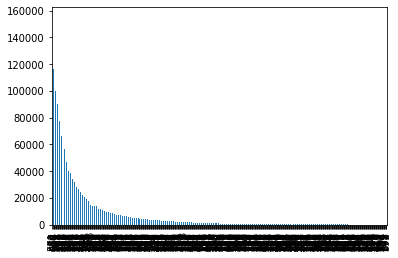

In [15]:
#Grafico de barras de columna "id_movies"

fig, ax = plt.subplots()
df['id_movie'].value_counts().plot(ax=ax, kind='bar')

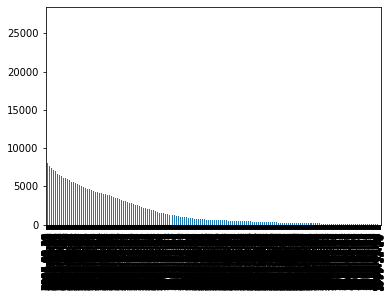

In [16]:
#Grafico de barras de columna "date"

fig, ax = plt.subplots()
df['date'].value_counts().plot(ax=ax, kind='bar')

In [ ]:
#Grafico de caja de columna "id_user"

fig, ax = plt.subplots()
df['id_user'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

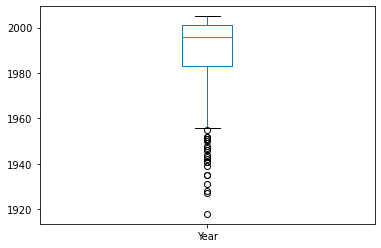

In [12]:
#Grafico de caja de columna "year"

df.boxplot(column = 'Year', grid=False)

<AxesSubplot:>

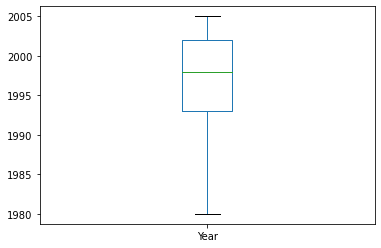

In [13]:
#Grafico de barras de columna "year" ajustado para datos mayores a 1979

df2 = df[df.Year > 1979]
df2.boxplot(column = 'Year', grid=False)

Vemos ahora el segundo dataset, que llamaremos df2. Este se recupera del archivo movie_titles_vCorta.

In [14]:
#Visualización porcentual de carencia de información. Se ve que no existe ningún Nan. Todos los datos de df2 están completos.

columnas = list(df)
for columna in columnas:
    print("Cantidad de datos sin " + columna + ": " + str(len(df) - df[columna].count()))
    print(str(np.round((len(df) - df[columna].count())/float(len(df))*100,2))+"%")
    print("-------")

Cantidad de datos sin ID: 0
0.0%
-------
Cantidad de datos sin Year: 0
0.0%
-------
Cantidad de datos sin Movie: 0
0.0%
-------


Vemos cómo se ven los datos de este df2

In [15]:
df.head()

,ID,Year,Movie
0,3,1997,Character
1,5,2004,The Rise and Fall of ECW
2,6,1997,Sick
3,7,1992,8 Man
4,8,2004,What the #$*! Do We Know!?


In [16]:
df.dropna(axis=0)

,ID,Year,Movie
0,3,1997,Character
1,5,2004,The Rise and Fall of ECW
2,6,1997,Sick
3,7,1992,8 Man
4,8,2004,What the #$*! Do We Know!?
...,...,...,...
487,803,2001,Soul Assassin
488,804,1944,Sherlock Holmes: The Scarlet Claw
489,806,1960,Eyes Without a Face
490,807,1959,The Mouse That Roared


In [17]:
df.dropna(axis = 1)

,ID,Year,Movie
0,3,1997,Character
1,5,2004,The Rise and Fall of ECW
2,6,1997,Sick
3,7,1992,8 Man
4,8,2004,What the #$*! Do We Know!?
...,...,...,...
487,803,2001,Soul Assassin
488,804,1944,Sherlock Holmes: The Scarlet Claw
489,806,1960,Eyes Without a Face
490,807,1959,The Mouse That Roared


Visualizamos datos junto a sus características generales.

In [20]:
df2.describe()

,ID,Year
count,382.000000,382.000000
mean,417.578534,1996.939791
std,231.751378,6.227029
min,3.000000,1980.000000
25%,209.250000,1993.000000
50%,426.500000,1998.000000
75%,628.750000,2002.000000
max,808.000000,2005.000000


In [22]:
df2 = df2[df2.edad < 100]
df2.describe()

,ID,Year
count,382.000000,382.000000
mean,417.578534,1996.939791
std,231.751378,6.227029
min,3.000000,1980.000000
25%,209.250000,1993.000000
50%,426.500000,1998.000000
75%,628.750000,2002.000000
max,808.000000,2005.000000


Procedemos a crear un df3 con los datos limpiados, así como volver a ver en qué consisten.

In [24]:
# Reemplazar datos
df3 = df
#promedio_edad = df3["edad"].mean()
#print(promedio_edad)

In [25]:
#df3["edad"].replace(np.nan, promedio_edad, inplace=True)
df3.describe()

,ID,Year
count,492.000000,492.000000
mean,415.093496,1989.310976
std,231.653042,16.475460
min,3.000000,1918.000000
25%,211.500000,1983.000000
50%,415.500000,1996.000000
75%,622.750000,2001.000000
max,808.000000,2005.000000


Introduciremos ahora otro set de datos que usaremos para recolectar data. Este corresponde a un archivo .json (transformado a .csv) Que recopila mucha información acercad de todas las películas de los datapacks anteriores. Sin embargo, como veremos, le faltará mucha información. Lo llamaremos df4.

In [4]:
#ruta1 = "C:\Users\leona\OneDrive\Documentos\netflix modulo\movieExtraInfojsonacsv.csv"
df4 = pd.read_csv(r"C:\Users\leona\OneDrive\Documentos\netflix modulo\movieExtraInfojsonacsv.csv")
df4.head()

,|,|__Title,|__Year,|__Rated,|__Released,|__Runtime,|__Genre,|__Director,|__Writer,|__Actors,...,|__imdbVotes,|__imdbID,|__Type,|__DVD,|__BoxOffice,|__Production,|__Website,|__Response,|__Error,|__totalSeasons
0,3.0,Character,1997,R,27 Mar 1998,122 min,"Crime, Drama, Mystery",Mike van Diem,"Ferdinand Bordewijk (short story ""Dreverhaven ...","Jan Decleir, Fedja van Huêt, Betty Schuurman, ...",...,"10,015",tt0119448,movie,NaN,NaN,Almerica Film,NaN,True,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Movie not found!,NaN
3,6.0,"Sick: The Life & Death of Bob Flanagan, Superm...",1997,Not Rated,07 Nov 1997,90 min,Documentary,Kirby Dick,NaN,"Kathe Burkhart, Kirby Dick, Bob Flanagan, Sher...",...,"1,459",tt0120126,movie,NaN,NaN,Sick-the Life and Death of Bob Flanagan-Superm...,NaN,True,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nuevamente, le cambiaremos el nombre a las columnas para que sea más facil de analizar.

In [5]:
cabecera1 = ["ID_MOVIE", "TITULO", "ANHO", "RATED", "RELEASE", "DURACION", "GENERO", "DIRECTOR", "ESCRITOR", "ACTORES", "PLOT", "IDIOMA", "PAIS", "PREMIOS", "POSTER", "RATINGS", "METASCORE", "IMDBRATING", "IMDBVOTES", "IMDBID", "TYPE", "DVD", "BOXOFFICE", "PRODUCTION", "WEBSITE", "RESPONSE", "ERROR", "TOTAL SEASONS", "UWU"]
df4.columns = cabecera1
df4.head()

,ID_MOVIE,TITULO,ANHO,RATED,RELEASE,DURACION,GENERO,DIRECTOR,ESCRITOR,ACTORES,...,IMDBID,TYPE,DVD,BOXOFFICE,PRODUCTION,WEBSITE,RESPONSE,ERROR,TOTAL SEASONS,UWU
0,3.0,Character,1997,R,27 Mar 1998,122 min,"Crime, Drama, Mystery",Mike van Diem,"Ferdinand Bordewijk (short story ""Dreverhaven ...","Jan Decleir, Fedja van Huêt, Betty Schuurman, ...",...,"10,015",tt0119448,movie,NaN,NaN,Almerica Film,NaN,True,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Movie not found!,NaN
3,6.0,"Sick: The Life & Death of Bob Flanagan, Superm...",1997,Not Rated,07 Nov 1997,90 min,Documentary,Kirby Dick,NaN,"Kathe Burkhart, Kirby Dick, Bob Flanagan, Sher...",...,"1,459",tt0120126,movie,NaN,NaN,Sick-the Life and Death of Bob Flanagan-Superm...,NaN,True,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualizamos el porcentaje de datos faltantes. Notamos que son muchos.

In [6]:
columnas1 = list(df4)
for columna in columnas1:
    print("Cantidad de datos sin " + columna + ":" + str(len(df4) - df4[columna].count()))
    print(str(np.round((len(df4) - df4[columna].count())/float(len(df4))*100,2))+"%")
    print("-----")

Cantidad de datos sin ID_MOVIE:545
52.15%
-----
Cantidad de datos sin TITULO:609
58.28%
-----
Cantidad de datos sin ANHO:609
58.28%
-----
Cantidad de datos sin RATED:660
63.16%
-----
Cantidad de datos sin RELEASE:619
59.23%
-----
Cantidad de datos sin DURACION:614
58.76%
-----
Cantidad de datos sin GENERO:609
58.28%
-----
Cantidad de datos sin DIRECTOR:626
59.9%
-----
Cantidad de datos sin ESCRITOR:638
61.05%
-----
Cantidad de datos sin ACTORES:610
58.37%
-----
Cantidad de datos sin PLOT:624
59.71%
-----
Cantidad de datos sin IDIOMA:609
58.28%
-----
Cantidad de datos sin PAIS:609
58.28%
-----
Cantidad de datos sin PREMIOS:766
73.3%
-----
Cantidad de datos sin POSTER:617
59.04%
-----
Cantidad de datos sin RATINGS:68
6.51%
-----
Cantidad de datos sin METASCORE:68
6.51%
-----
Cantidad de datos sin IMDBRATING:880
84.21%
-----
Cantidad de datos sin IMDBVOTES:613
58.66%
-----
Cantidad de datos sin IMDBID:613
58.66%
-----
Cantidad de datos sin TYPE:609
58.28%
-----
Cantidad de datos sin DVD:6

In [7]:
df4.describe(include="all")

,ID_MOVIE,TITULO,ANHO,RATED,RELEASE,DURACION,GENERO,DIRECTOR,ESCRITOR,ACTORES,...,IMDBID,TYPE,DVD,BOXOFFICE,PRODUCTION,WEBSITE,RESPONSE,ERROR,TOTAL SEASONS,UWU
count,500.000000,436,436,385,426,431,436,419,407,435,...,432,436,436,30,0.0,288,0.0,500,64,13.000000
unique,NaN,435,77,19,407,105,222,395,404,435,...,424,436,2,30,NaN,217,NaN,2,1,NaN
top,NaN,Crash Dive,2002,R,20 Oct 2000,90 min,Drama,Kevin Smith,Kevin Smith,"Annabella Sciorra, Rebecca De Mornay, Matt McC...",...,362,tt0043565,movie,25 Feb 2003,NaN,Paramount,NaN,True,Movie not found!,NaN
freq,NaN,2,30,169,3,23,34,3,3,1,...,3,1,422,1,NaN,8,NaN,436,64,NaN
mean,416.734000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.692308
std,231.590119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.594373
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,217.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,420.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,625.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


En base a df4 crearemos un df5, que es el que limpiaremos y finalmente usaremos. Eliminaremos una gran cantidad de columnas que se consideran innecesarias al momento de realizar el análisis.

In [8]:
df5 = df4

In [9]:
df5.drop(["ID_MOVIE", "TITULO", "ANHO", "RELEASE", "DIRECTOR", "ESCRITOR", "ACTORES", "PLOT", "IDIOMA", "PAIS", "PREMIOS", "POSTER", "RATINGS", "METASCORE", "IMDBRATING", "IMDBVOTES", "IMDBID", "TYPE", "DVD", "BOXOFFICE", "PRODUCTION", "WEBSITE", "RESPONSE", "ERROR", "TOTAL SEASONS"], inplace = True, axis=1)

In [10]:
df5.describe(include="all")

,RATED,DURACION,GENERO,UWU
count,385,431,436,13.000000
unique,19,105,222,NaN
top,R,90 min,Drama,NaN
freq,169,23,34,NaN
mean,NaN,NaN,NaN,2.692308
std,NaN,NaN,NaN,2.594373
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,4.000000


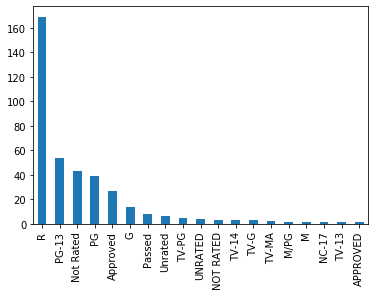

In [11]:
#Graficode barras de columna "rated"


fig, ax = plt.subplots()
df5['RATED'].value_counts().plot(ax=ax, kind='bar')

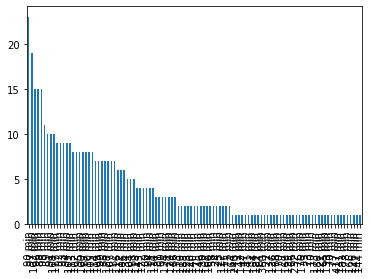

In [12]:
#Graficode barras de columna "duracion"

fig, ax = plt.subplots()
df5['DURACION'].value_counts().plot(ax=ax, kind='bar')

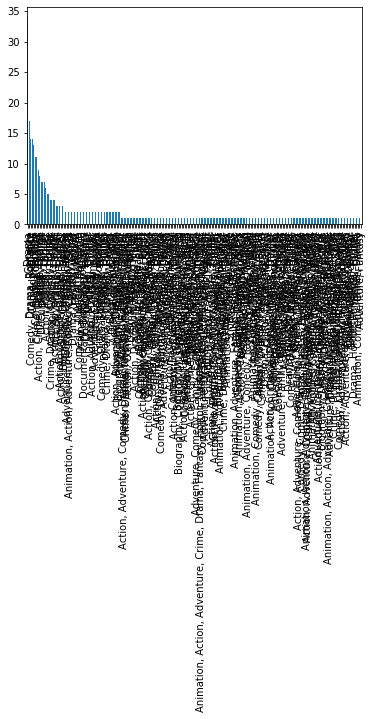

In [13]:
#Graficode barras de columna "genero"

fig, ax = plt.subplots()
df5['GENERO'].value_counts().plot(ax=ax, kind='bar')

----------------------------------------------
# EJECUTAR DE AQUÍ EN ADELANTE XDDDDDD

# Matri(x)z de caracteristicas

En lo que sigue procederemos a añadir los datos necesarios a la matriz de característica final, que usará como base a df, y renombraremos como MC. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from datetime import datetime, timedelta
rutaMC = r"test3.csv"
dfMC = pd.read_csv(rutaMC, error_bad_lines=False)
dfMC.head()

,id_movie,id_user,ranking,fecha,movieYear,Crime,Drama,Mistery,Documentary,Action,...,Animation,Adventure,Fantasy,War,History,Western,Film-Noir,Sport,Short,Mystery
0,3,1025579,4,2003-03-29,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,712664,5,2004-02-01,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1331154,4,2004-07-03,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,2632461,3,2005-07-22,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,44937,5,2004-06-22,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### ANTIGUEDAD

Agregaremos una columna fecha de referencia (un dia despues del dato más reciente) , que servirá para crear la columna "antiguedad".

In [2]:
MC = dfMC
fechaReferencia = ("2006-01-01")
MC["Fecha de Referencia"] = fechaReferencia
MC.head()

,id_movie,id_user,ranking,fecha,movieYear,Crime,Drama,Mistery,Documentary,Action,...,Adventure,Fantasy,War,History,Western,Film-Noir,Sport,Short,Mystery,Fecha de Referencia
0,3,1025579,4,2003-03-29,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2006-01-01
1,3,712664,5,2004-02-01,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2006-01-01
2,3,1331154,4,2004-07-03,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2006-01-01
3,3,2632461,3,2005-07-22,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2006-01-01
4,3,44937,5,2004-06-22,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2006-01-01


In [3]:
MC["Fecha de Referencia"] = pd.to_datetime(MC["Fecha de Referencia"]) 

In [4]:
MC["fecha"] = pd.to_datetime(MC['fecha'])

In [5]:
MC['Antiguedad'] = (MC["Fecha de Referencia"] - MC['fecha']).dt.days

In [7]:
MC.head()

,id_movie,id_user,ranking,fecha,movieYear,Crime,Drama,Mistery,Documentary,Action,...,Fantasy,War,History,Western,Film-Noir,Sport,Short,Mystery,Fecha de Referencia,Antiguedad
0,3,1025579,4,2003-03-29,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,1,2006-01-01,1009
1,3,712664,5,2004-02-01,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,1,2006-01-01,700
2,3,1331154,4,2004-07-03,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,1,2006-01-01,547
3,3,2632461,3,2005-07-22,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,1,2006-01-01,163
4,3,44937,5,2004-06-22,1997,1,1,0,0,0,...,0,0,0,0,0,0,0,1,2006-01-01,558


### RANKING BINARIO

Agregamos ahora la columna "Ranking binario", que corresponderá a la última columnad de la MC (luego se moverá).

In [8]:
MC["Ranking Binario"] = np.nan

In [9]:
MC["Ranking Binario"] = np.where(MC["ranking"]>3, 1, 0)

In [10]:
MC.head()

,id_movie,id_user,ranking,fecha,movieYear,Crime,Drama,Mistery,Documentary,Action,...,War,History,Western,Film-Noir,Sport,Short,Mystery,Fecha de Referencia,Antiguedad,Ranking Binario
0,3,1025579,4,2003-03-29,1997,1,1,0,0,0,...,0,0,0,0,0,0,1,2006-01-01,1009,1
1,3,712664,5,2004-02-01,1997,1,1,0,0,0,...,0,0,0,0,0,0,1,2006-01-01,700,1
2,3,1331154,4,2004-07-03,1997,1,1,0,0,0,...,0,0,0,0,0,0,1,2006-01-01,547,1
3,3,2632461,3,2005-07-22,1997,1,1,0,0,0,...,0,0,0,0,0,0,1,2006-01-01,163,0
4,3,44937,5,2004-06-22,1997,1,1,0,0,0,...,0,0,0,0,0,0,1,2006-01-01,558,1


Leeremos ahora desde el documento "movie_titles_Vcorta.csv", que llamaremos desde ahora MY

In [14]:
rutaMY = r"movie_titles_vCorta.csv"
MY = pd.read_csv(rutaMY, error_bad_lines=False)
MY.head()

b'Skipping line 40: expected 3 fields, saw 4\nSkipping line 204: expected 3 fields, saw 4\nSkipping line 280: expected 3 fields, saw 4\nSkipping line 355: expected 3 fields, saw 4\nSkipping line 366: expected 3 fields, saw 4\nSkipping line 406: expected 3 fields, saw 4\nSkipping line 408: expected 3 fields, saw 4\nSkipping line 452: expected 3 fields, saw 4\n'


,id_movie,year,movie
0,3,1997,Character
1,5,2004,The Rise and Fall of ECW
2,6,1997,Sick
3,7,1992,8 Man
4,8,2004,What the #$*! Do We Know!?


Reordenaremos la columna MC, para facilitar la creación de otras columnas.



In [4]:
MC_ordenado = MC.sort_values(["id_user", "fecha"])

NameError: name 'MC' is not defined

Reordenaremos la columna MC, para facilitar la creación de otras columnas.

In [ ]:
MC_ordenado = MC.sort_values(["id_user", "fecha"])

In [ ]:
MC_ordenado.head()

In [18]:
MC_ordenado.reset_index(level=0, inplace = True)

In [34]:
i = 0
while i < 10:#len(MC_ordenado["id_user"]):
    i+=1
    if MC_ordenado["id_user"][i] == MC_ordenado["id_user"][i-1]:
        Peliculas = MC_ordenado.at[i-1,"Peliculas Vistas"]+1
    else:
        Peliculas = 1
    MC_ordenado.loc[i, "Peliculas Vistas"] = Peliculas

In [35]:
MC_ordenado.head()

,id_movie,id_user,ranking,fecha,Fecha de Referencia,Antiguedad,Ranking Binario,Movie Year,Peliculas Vistas
0,705,6,3,2004-03-09,2006-01-01,663,0,NaN,1.0
1,723,6,3,2004-03-28,2006-01-01,644,0,NaN,2.0
2,30,6,3,2004-09-15,2006-01-01,473,0,NaN,3.0
3,173,6,4,2004-09-15,2006-01-01,473,1,NaN,4.0
4,329,6,4,2004-09-15,2006-01-01,473,1,NaN,5.0


### CAMBIAR RANKING BINARIO AL FINAL DE LA TABLA (este sería el paso final y con eso la matriz queda lista equis de)

In [ ]:
MC = MC_ordenado

In [ ]:
MC = MC[[c for c in MC if c not in ["Ranking Binario"]] 
       + ["Ranking Binario"]]

In [1]:
MC.head()

NameError: name 'MC' is not defined

## GUARDAR MC EN .CSV

In [ ]:
# saving the dataframe 

#CAMBIAR RUTA ACORDE A LA CARPETA DONDE TIENEN TODO

MC.to_csv(r'MATRIZ.csv', index=False)

-----------------------

# APLICACIÓN DE MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from datetime import datetime, timedelta

#CAMBIAR RUTA ACORDE A LA CARPETA DONDE TIENEN MATRIZ.csv

rutaMC = r"MATRIZ.csv"
MC = pd.read_csv(rutaMC)
MC.head()

FileNotFoundError: [Errno 2] No such file or directory: 'MATRIZ.csv'

### Let the copypasta begin

## INDICADORES DE CLASIFICACIÓN

In [ ]:
#Importamos las librerías necesarias

import datetime as dt
import numpy as np
import pandas as pd
import sys

In [ ]:
# HELLLLLLP 

#ejecuten este código para ver los nombres de todas las columnas de MC. En el siguiente cuadro de codigo deben poner todas las
#columnas excepto las 3 llaves (id_movie, id_usuario, fecha) y la última columna (ranking binario)

list(MC)

#### Características  (aka n columnas)

In [ ]:
#En este código deben poner todas las columnas EXCEPTO las 3 llaves (id_movie, id_usuario, fecha) 
#y la última columna (ranking binario)

caracteristicas = ['ADHR_NUM_EMPLEADOS', 'ADHR_TASA_TOTAL', 'ACC_TB', 'ACC_TB_prom3M', 'ACC_TY', 'ACC_TY_prom3M', 'DIAS_MENS_EP', 'DIAS_MENS_EP_prom3M', 'DIAS_MENS_TB', 'DIAS_MENS_TB_prom3M', 'DIAS_MENS_TY', 'DIAS_MENS_TY_prom3M', 'ENF_PROF', 'ENF_PROF_prom3M', 'Antiguedad']


In [ ]:
X = MC.loc[:,caracteristicas].to_numpy()

#### Etiqueta (aka última columna a predecir)

In [ ]:
#Aquí va "Ranking Binario", no antes

etiqueta = ["Ranking Binario"]
y = MC.loc[:,etiqueta].to_numpy()

## Sin cross validation, para todos los indicadores

## Árbol de Decisión

In [ ]:
#Importar librerias para arbol de decisión

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
ad = DecisionTreeClassifier() # Creando el modelo

In [ ]:
#Entreno el modelo
ad.fit(X_train, y_train)

In [ ]:
#Realizo una predicción
Y_pred = ad.predict(X_test)

### Matriz de Confusión (clasificación? xdddd)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()

In [ ]:
correctitud = (tp+tn)/float(tp+fp+fn+tn)
sensibilidad = (tp)/float(tp+fn)
especificidad = (tn)/float(fp+tn)
precision = (tp)/float(tp+fp)
tasa_real = (tp+fn)/float(tp+fp+fn+tn)
f1_score = 2*(precision*sensibilidad)/float(precision+sensibilidad)

In [ ]:
print("correctitud: " + str(np.round(correctitud*100,2)) + "%")
print("sensibilidad: " + str(np.round(sensibilidad*100,2)) + "%")
print("especificidad: " + str(np.round(especificidad*100,2)) + "%")
print("precision: " + str(np.round(precision*100,2)) + "%")
print("tasa_real: " + str(np.round(tasa_real*100,2)) + "%")
print("f1_score: " + str(np.round(f1_score*100,2)) + "%")

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier() # Creando el modelo

In [ ]:
#Entreno el modelo
rf.fit(X_train, y_train)

In [ ]:
#Realizo una predicción
Y_pred = rf.predict(X_test)

### Matriz de Confusión (clasificación? xdddd)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()

In [ ]:
correctitud = (tp+tn)/float(tp+fp+fn+tn)
sensibilidad = (tp)/float(tp+fn)
especificidad = (tn)/float(fp+tn)
precision = (tp)/float(tp+fp)
tasa_real = (tp+fn)/float(tp+fp+fn+tn)
f1_score = 2*(precision*sensibilidad)/float(precision+sensibilidad)

In [ ]:
print("correctitud: " + str(np.round(correctitud*100,2)) + "%")
print("sensibilidad: " + str(np.round(sensibilidad*100,2)) + "%")
print("especificidad: " + str(np.round(especificidad*100,2)) + "%")
print("precision: " + str(np.round(precision*100,2)) + "%")
print("tasa_real: " + str(np.round(tasa_real*100,2)) + "%")
print("f1_score: " + str(np.round(f1_score*100,2)) + "%")

## Con Cross Validation para ambos modelos 

## Indicador "f1_score"

In [ ]:
from sklearn.model_selection import cross_val_score

### Para Árbol de Decisión

In [ ]:
cv_ad_f1 = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='f1')

In [ ]:
cv_ad_f1

### Para Random Forest

In [ ]:
cv_rf_f1 = cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='f1')

In [ ]:
cv_rf_f1

### Comparación entre ambos modelos

In [ ]:
np.mean(cv_ad_f1)

In [ ]:
np.mean(cv_rf_f1)